In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from tensorflow.keras import models,layers

In [7]:
from tensorflow.keras.layers import Dense,Dropout,Input,Conv2D,MaxPooling2D,Flatten

In [6]:
from tensorflow.keras.models import Sequential,Model

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

In [18]:
import matplotlib.pyplot as plt

In [9]:
base_dir=r"C:\Users\Venkatesh\OneDrive\Desktop\DLE\DLE Lab\Datasets\Bean Dataset"

In [11]:
train_dataset=image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    seed=42,
    batch_size=32,
    subset='training',
    image_size=(256,256),
)

Found 990 files belonging to 3 classes.
Using 792 files for training.


In [13]:
test_dataset=image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    seed=42,
    subset='validation',
    image_size=(256,256),
    batch_size=32
)

Found 990 files belonging to 3 classes.
Using 198 files for validation.


In [14]:
model=Sequential([
    Flatten(input_shape=(256,256,3)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(3,activation='softmax')
])

C:\Users\Venkatesh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [16]:
history=model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 886ms/step - loss: 7107.7998 - val_loss: 772.4644
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 791ms/step - loss: 2542.2263 - val_loss: 311.7448
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 775ms/step - loss: 869.4081 - val_loss: 147.5452
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 774ms/step - loss: 161.2824 - val_loss: 22.4440
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 784ms/step - loss: 13.9850 - val_loss: 1.4530


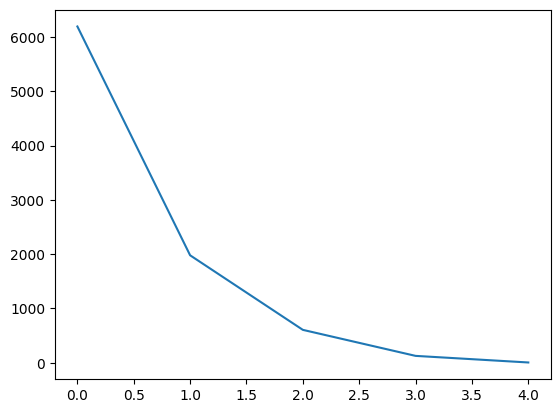

In [20]:
plt.plot(history.history['loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Class Names: ['angular_leaf_spot', 'bean_rust', 'healthy']
Predicted Class: bean_rust


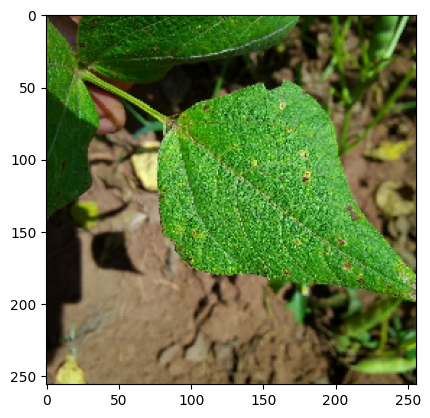

In [22]:
import numpy as np
img_path = r"C:\Users\Venkatesh\OneDrive\Desktop\DLE\DLE Lab\Datasets\Bean Dataset\bean_rust\bean_rust_02.jpg"

img = tf.keras.utils.load_img(img_path, target_size=(256, 256))  # Resize same as training
img_array = tf.keras.utils.img_to_array(img)                     # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)                    # Add batch dimension (1, 224, 224, 3)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_names = train_dataset.class_names
print("Class Names:", class_names)

print(f"Predicted Class: {class_names[predicted_class]}")
plt.imshow(img)



In [26]:
cnn_model=Sequential([
    Input(shape=(256,256,3)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(3,activation='softmax')
])

cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
history=cnn_model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - loss: 1585.7559 - val_loss: 1.1121
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - loss: 1.0559 - val_loss: 1.1171
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.9693 - val_loss: 1.0979
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - loss: 0.7737 - val_loss: 1.2805
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - loss: 0.4540 - val_loss: 2.3014
